# Let's make our own optimization problem

In [1]:
class SomeFun:
    def __init__(self, dim=10):
        self.xlow = -10 * np.ones(dim) # lower bounds
        self.xup = 10 * np.ones(dim) # upper vound
        self.dim = dim # dimensionality
        self.info = "Our own " + str(dim)+"-dimensional function!" # info
        self.integer = np.array([0]) # integer variables
        self.continuous = np.arange(1, dim) # continuos variables

    def objfunction(self, x):
        return np.sum(x) * np.cos(np.sum(x))

## Import the necessary modules

In [3]:
# Import the necessary modules
from pySOT import *
from poap.controller import SerialController, BasicWorkerThread
import numpy as np

# Decide how many evaluations we are allowed to use
maxeval = 500

# (1) Optimization problem
# Use our 10-dimensional function
data = SomeFun(dim=10)
print(data.info)

# (2) Experimental design
# Use a symmetric Latin hypercube with 2d + 1 samples
exp_des = SymmetricLatinHypercube(dim=data.dim, npts=2*data.dim+1)

# (3) Surrogate model
# Use a cubic RBF interpolant with a linear tail
surrogate = RBFInterpolant(kernel=CubicKernel, tail=LinearTail, maxp=maxeval)

# (4) Adaptive sampling
# Use DYCORS with 100d candidate points
adapt_samp = CandidateDYCORS(data=data, numcand=100*data.dim)

Our own 10-dimensional function!


## Run optimization in serial

In [4]:
# Use the serial controller (uses only one thread)
controller = SerialController(data.objfunction)

# (5) Use the sychronous strategy without non-bound constraints
strategy = SyncStrategyNoConstraints(
        worker_id=0, data=data, maxeval=maxeval, nsamples=1,
        exp_design=exp_des, response_surface=surrogate, 
        sampling_method=adapt_samp)
controller.strategy = strategy

# Run the optimization strategy
result = controller.run()

# Print the final result
print('Best value found: {0}'.format(result.value))
print('Best solution found: {0}'.format(
    np.array_str(result.params[0], max_line_width=np.inf,
                precision=5, suppress_small=True)))

Best value found: -53.4002404601
Best solution found: [ 9.       6.87401  3.16378  3.98825  7.08751  1.78209  0.70359  6.43452  9.8263   4.59035]


## Plot the progress

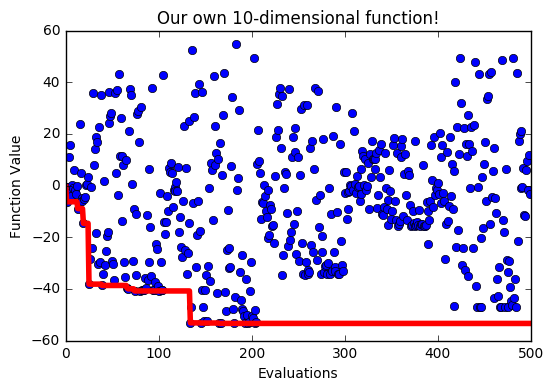

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Extract function values from the controller
fvals = np.array([o.value for o in controller.fevals])

f, ax = plt.subplots()
ax.plot(np.arange(0,maxeval), fvals, 'bo')  # Points
ax.plot(np.arange(0,maxeval), np.minimum.accumulate(fvals), 'r-', linewidth=4.0)  # Best value found
plt.xlabel('Evaluations')
plt.ylabel('Function Value')
plt.title(data.info)
plt.show()

## Written by, David Eriksson, dme65@cornell.edu